<a href="https://colab.research.google.com/github/Hadad-Ahmed-Ali/ApprendreAnglais/blob/main/Travail_de_recherche_L3(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [3]:
def wald_ci(p, n):
    z = 1.96
    born_inf = p - z*np.sqrt(p*(1-p)/n)
    born_sup = p + z*np.sqrt(p*(1-p)/n)
    return (born_inf, born_sup)

In [4]:
def wilson_ci(p, n):
    z = 1.96
    term = z*np.sqrt(p*(1-p)/n + z*z/(4*n*n))
    born_inf = (p + z*z/(2*n) - term)/(1+(z*z)/n)
    born_sup = (p + z*z/(2*n) + term)/(1+(z*z)/n)
    return born_inf, born_sup

In [5]:
def agresti_coull_ci(p, n):
   # quantile de la loi normale standard pour le niveau 
   # de confiance alpha/2 avec alpha 5%
    z = 1.96
    A = p*(n/(n+4))+0.5*(4/(n+4))
    j = n + 4
    
    # Calculer l'écart-type estimé de la distribution de A
    B = z*np.sqrt(A*(1-A)/j)

    # Calculer l'intervalle de confiance
    born_inf = A - B
    born_sup = A + B
    
    return born_inf, born_sup

In [6]:
def graphe1(n1, n2, num_reps, methode):
    # Valeurs de p à considérer
    ps = np.linspace(0.005, 0.98, 100)
    # Probabilités de couverture pour chaque valeur de p
    proba_couverture1 = []
    proba_couverture2 = []
    for p in ps:
        i1 = 0
        i2 = 0
        for j in range(num_reps):
            # Générer un échantillon de taille n1 à partir d'une distribution Bernoulli avec une probabilité p donnée
            sample1 = np.random.binomial(1, p, n1)
            # Calculer l'intervalle de confiance selon la méthode donnée
            born_inf1, born_sup1 = methode(np.mean(sample1), n1)
            # Vérifier si la vraie proportion p est couverte par l'intervalle de confiance
            if p >= born_inf1 and p <= born_sup1:
                i1 += 1 
            # Générer un échantillon de taille n2 à partir d'une distribution Bernoulli avec une probabilité p donnée
            sample2 = np.random.binomial(1, p, n2)
            # Calculer l'intervalle de confiance selon la méthode donnée
            born_inf2, born_sup2 = methode(np.mean(sample2), n2)
            # Vérifier si la vraie proportion p est couverte par l'intervalle de confiance
            if p >= born_inf2 and p <= born_sup2:
                i2 += 1
        # Ajouter la probabilité de couverture à la liste
        proba_couverture1.append(i1/num_reps)
        proba_couverture2.append(i2/num_reps)
    plt.figure(figsize=(8, 4))
    plt.plot(ps, proba_couverture1, color='black', label=f'n={n1}')
    plt.plot(ps, proba_couverture2, color='blue', label=f'n={n2}')
    plt.axhline(y=0.95, color='r', linestyle='--')
    plt.xlabel('Valeur de p')
    plt.ylabel('Probabilité de couverture des IC')
    plt.title('Oscillations des prob de couvertures des IC')
    plt.legend()
    plt.show()

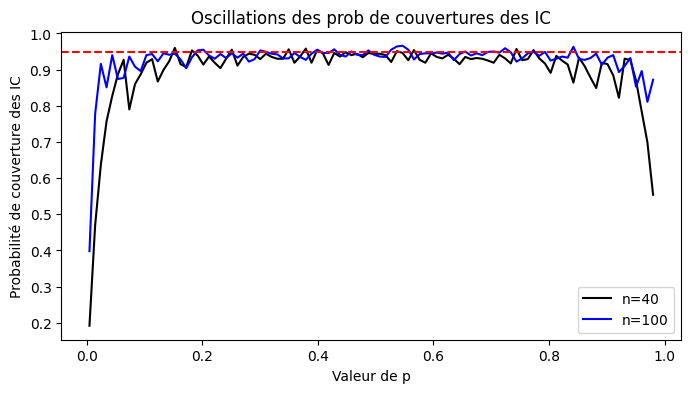

In [7]:
graphe1(40,100,1000,wald_ci)

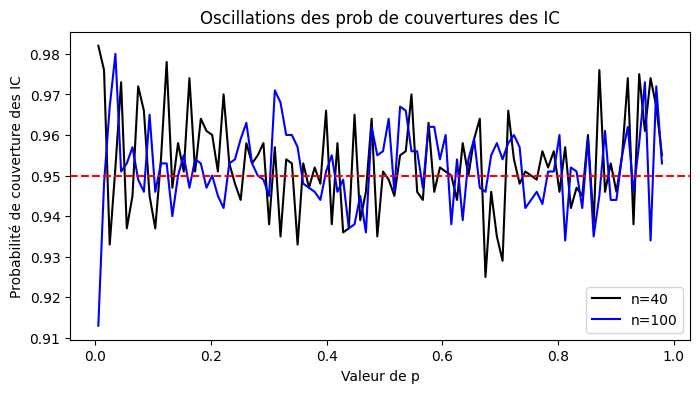

In [8]:
graphe1(40,100,1000,wilson_ci)

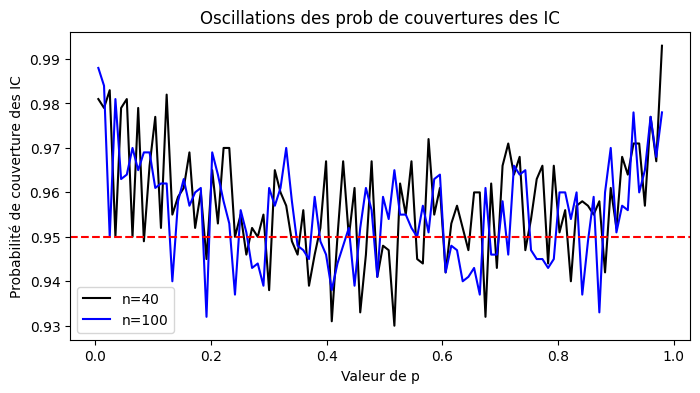

In [9]:
graphe1(40,100,1000,agresti_coull_ci)

In [10]:
  #  Calcul du quantiule de la loi beta
def quantile_beta(ordre, a, b):
    # degrés de liberté a et b

    # niveau de confiance ordre

    # calcul du quantile
    q = beta.ppf(ordre, a, b)

    return q

In [11]:
def clopper_pearson(x, n):
    
    alpha = 0.05
    ordre_1 = alpha/2
    ordre_2 = 1-(alpha/2)
    
    born_inf = quantile_beta(ordre_1, x, (n-x+1))
    born_sup = quantile_beta(ordre_2, (x+1), (n-x))

    return born_inf, born_sup

In [12]:
def graphe2(n1, n2, num_reps):
    ps = np.linspace(0.005, 0.98, 50)
    proba_couverture1 = []
    proba_couverture2 = []
    for p in ps:
        i1 = 0
        i2 = 0
        for j in range(num_reps):
            # Générer un échantillon de taille n1 à partir d'une distribution Bernoulli avec une probabilité p donnée
            sample1 = np.random.binomial(1, p, n1)
            # Nombre de succés 
            somme1 = np.sum(sample1)
            # Calculer l'intervalle de confiance selon la méthode donnée
            born_inf1, born_sup1 = clopper_pearson(somme1, n1)
            # Vérifier si la vraie proportion p est couverte par l'intervalle de confiance
            if p >= born_inf1 and p <= born_sup1:
                i1 += 1
            # Générer un échantillon de taille n2 à partir d'une distribution Bernoulli avec une probabilité p donnée
            sample2 = np.random.binomial(1, p, n2)
            somme2 = np.sum(sample2)
            # Calculer l'intervalle de confiance selon la méthode donnée
            born_inf2, born_sup2 = clopper_pearson(somme2, n2)
            # Vérifier si la vraie proportion p est couverte par l'intervalle de confiance
            if p >= born_inf2 and p <= born_sup2:
                i2 += 1
        proba_couverture1.append(i1/num_reps)
        proba_couverture2.append(i2/num_reps)
    plt.figure(figsize=(8, 4))
    plt.plot(ps, proba_couverture1, color='black', label=f'n={n1}')
    plt.plot(ps, proba_couverture2, color='blue', label=f'n={n2}')
    plt.axhline(y=0.95, color='r', linestyle='--')
    plt.xlabel('Valeur de p')
    plt.ylabel('Probabilité de couverture des IC')
    plt.title('Oscillations des prob de couvertures des IC')
    plt.legend()
    plt.show()

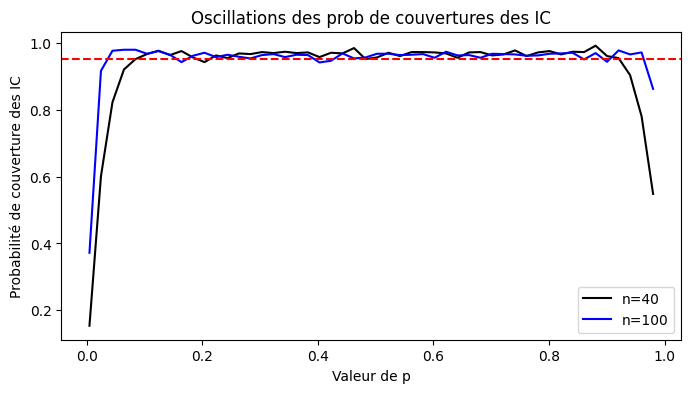

In [13]:
graphe2(40,100,1000)

                   Combinaison simultanée des differentes méthode avec une taille n qui varie

In [14]:
def graphe4(n1, num_reps):
    # Valeurs de p à considérer
    ps = np.linspace(0.005, 0.98, 60)
    # Probabilités de couverture pour chaque valeur de p
    proba_couverture_wald = []
    proba_couverture_wilson = []
    proba_couverture_cp = []
    proba_couverture_agc = []
    for p in ps:
        i_wald = i_wilson = i_cp = i_agc = 0
        for j in range(num_reps):
            # Générer un échantillon de taille n1 à partir d'une distribution Bernoulli avec une probabilité p donnée
            sample1 = np.random.binomial(1, p, n1)
            somme = np.sum(sample1)
            # Calculer l'intervalle de confiance selon les méthodes de Wald, Wilson, Clopper-Pearson et Agresti-Coull
            born_inf_wald, born_sup_wald = wald_ci(np.mean(sample1), n1)
            born_inf_wilson, born_sup_wilson = wilson_ci(np.mean(sample1), n1)
            born_inf_cp, born_sup_cp = clopper_pearson(somme, n1)
            born_inf_agc, born_sup_agc = agresti_coull_ci(np.mean(sample1), n1)
            # Vérifier si la vraie proportion p est couverte par l'intervalle de confiance
            if p >= born_inf_wald and p <= born_sup_wald:
                i_wald += 1 
            if p >= born_inf_wilson and p <= born_sup_wilson:
                i_wilson += 1 
            if p >= born_inf_cp and p <= born_sup_cp:
                i_cp += 1 
            if p >= born_inf_agc and p <= born_sup_agc:
                i_agc += 1 

        # Ajouter la probabilité de couverture à chaque liste
        proba_couverture_wald.append(i_wald/num_reps)
        proba_couverture_wilson.append(i_wilson/num_reps)
        proba_couverture_cp.append(i_cp/num_reps)
        proba_couverture_agc.append(i_agc/num_reps)
    
    # Afficher les courbes de probabilité de couverture pour chaque méthode dans un même graphe
    plt.figure(figsize=(7, 3))
    plt.plot(ps, proba_couverture_wald, color='blue', label=f'Wald')
    plt.plot(ps, proba_couverture_wilson, color='green', label=f'Wilson')
    plt.plot(ps, proba_couverture_cp, color='red', label=f'Clopper-Pearson')
    plt.plot(ps, proba_couverture_agc, color='purple', label=f'Agresti-Coull')
    plt.axhline(y=0.95, color='black', linestyle='--')
    plt.xlabel('Valeur de p')
    plt.ylabel('Probabilité de couverture des intervalles')
    plt.title(f'Oscillations des proba de couvertures à n={n1}')
    plt.legend()
    plt.show()

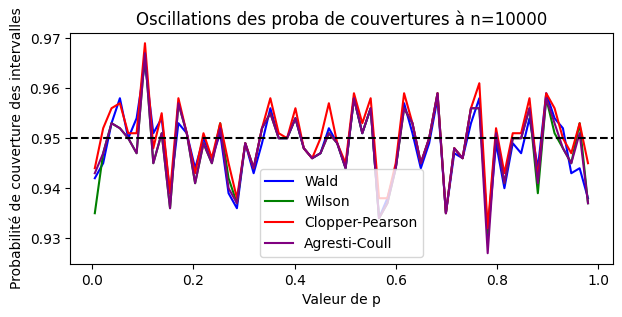

In [15]:
graphe4(10000,1000)

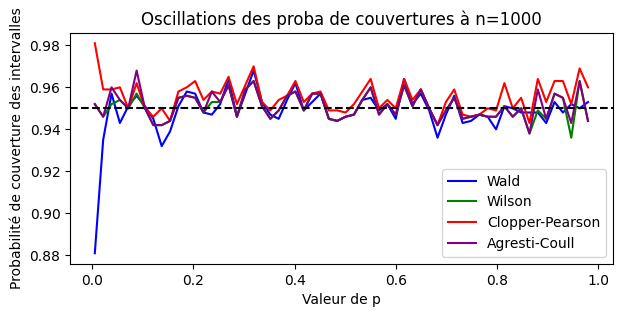

In [16]:
graphe4(1000,1000)

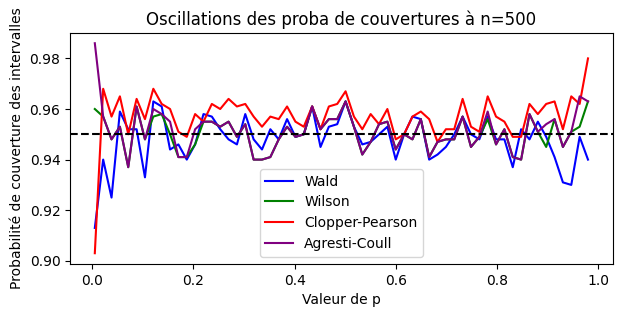

In [17]:
graphe4(500,1000)

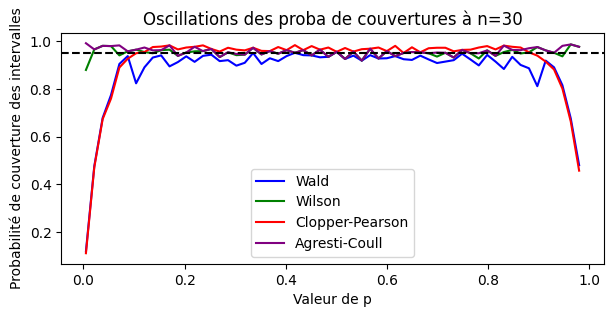

In [18]:
graphe4(30,1000)